In [19]:
#import some modules
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("successfully imported modules")

successfully imported modules


In [25]:
import sqlite3
#connect to the database
conn = sqlite3.connect("attr_data.db")

# check that connection was successful
print("Database connected successfully!", print(type(conn)))

<class 'sqlite3.Connection'>
Database connected successfully! None


In [26]:
#create a cursor object for execution of SQL queries
cursor = conn.cursor()

#check that cursor is created successfuly
print("Cursor created successfully \n",(type(cursor)))

Cursor created successfully 
 <class 'sqlite3.Cursor'>


In [23]:
#check the tables in the database
sql= """
SELECT name
FROM sqlite_schema
WHERE type = "table";
 """

#execute query
cursor.execute(sql)

#output query
result = cursor.fetchall()
result

[('attrition_records',), ('sqlite_sequence',)]

In [53]:
df= pd.read_sql_query("SELECT* FROM attrition_records", conn)
df.head(10)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


In [14]:
sql="""
SELECT *
FROM sqlite_master
"""

cursor.execute(sql)
result= cursor.fetchall()
result

[('table',
  'attrition_records',
  'attrition_records',
  2,
  'CREATE TABLE attrition_records (\n            id INTEGER PRIMARY KEY AUTOINCREMENT,\n            Age INT,\n            Attrition TEXT,\n            BusinessTravel TEXT,\n            DailyRate INT,\n            Department TEXT,\n            DistanceFromHome INT,\n            Education INT,\n            EducationField TEXT,\n            EmployeeCount INT,\n            EmployeeNumber INT,\n            EnvironmentSatisfaction,\n            Gender TEXT,\n            HourlyRate INT,\n            JobInvolvement INT,\n            JobLevel INT,\n            JobRole TEXT,\n            JobSatisfaction INT,\n            MaritalStatus TEXT,\n            MonthlyIncome INT,\n            MonthlyRate INT,\n            NumCompaniesWorked INT,\n            Over18 TEXT,\n            OverTime TEXT,\n            PercentSalaryHike INT,\n            PerformanceRating INT,\n            RelationshipSatisfaction INT,\n            StandardHours INT,

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [18]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
categories= df.dtypes[df.dtypes =='object'].index
print(categories)
df[categories].describe()

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [29]:
print(df.shape)
print(df.isna().sum())

(1470, 36)
id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSati

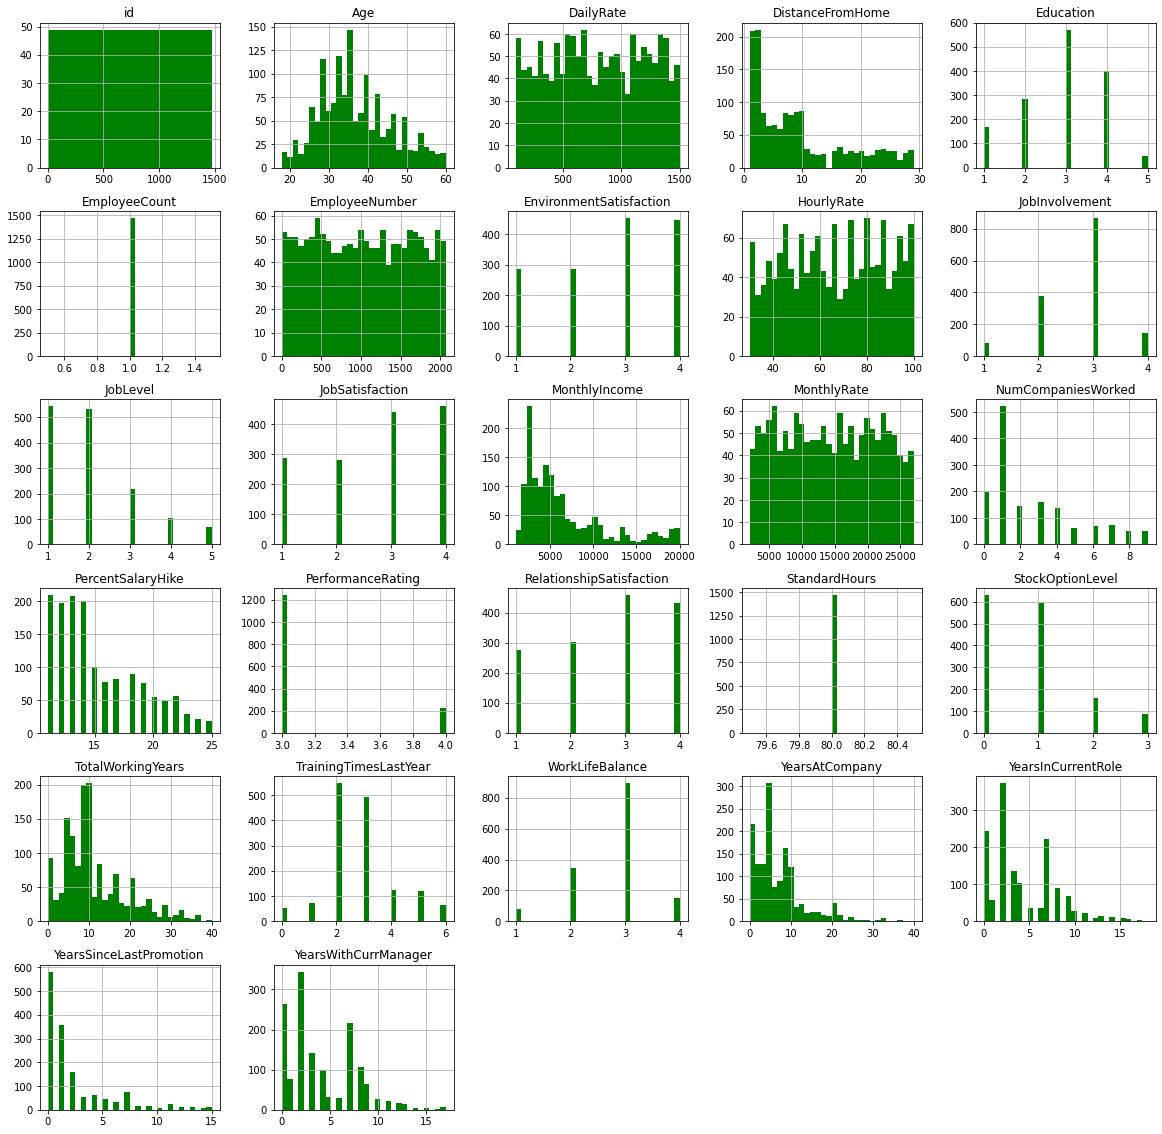

In [30]:
#this query is to check the 36columns in the table
df.hist(bins = 30, figsize = (20,20), color = 'g')

In [117]:
#NOTE: my observation is that there are some columns that do not change(constant) even when new employees come in.  # It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' sincer
 # It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' 
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis = 1, inplace = True)

In [55]:
#encoding numerical variables to categorical variables
df['Education'] = df['Education'].map({ 1: "Below College",2: "College",3: "Bachelor", 4: "Master", 5: "Doctor"})
df['Education'].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

In [57]:
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].map ({ 1: "Low", 2: "Medium", 3: "High", 4: "Very High"})
df['EnvironmentSatisfaction'].value_counts()

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

In [68]:
df["JobInvolvement"]= df["JobInvolvement"].map({1: "Low",2: "Medium",3: "High",4: "Very High"})
df["JobInvolvement"].value_counts()

Series([], Name: JobInvolvement, dtype: int64)

In [59]:
df["RelationshipSatisfaction"]= df["RelationshipSatisfaction"] .map({ 1: "Low",2: "Good",3: "Excellent",4: "Outstanding"})
df["RelationshipSatisfaction"].value_counts()

Excellent      459
Outstanding    432
Good           303
Low            276
Name: RelationshipSatisfaction, dtype: int64

In [60]:
df["PerformanceRating"]= df["PerformanceRating"].map({ 1: "Low",2: "Good",3: "Excellent", 4: "Outstanding"})
df["PerformanceRating"].value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

In [61]:
df["WorkLifeBalance"]= df["WorkLifeBalance"].map({ 1: "Bad", 2: "Good", 3: "Better", 4: "Best"})
df["WorkLifeBalance"].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

In [118]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,...,Outstanding,Outstanding,1,10,3,Better,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,...,Excellent,Good,0,7,3,Better,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,...,Excellent,Excellent,0,8,3,Better,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,...,Excellent,Outstanding,1,6,3,Better,2,2,2,2


Text(0, 0.5, 'Monthly income')

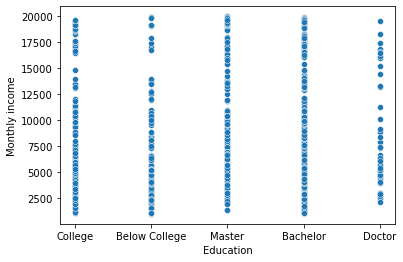

In [112]:
#relationship between education and monthly income
#plotting scatter plot
plt.figure(figsize=[6,4])
sns.scatterplot(x=df["Education"], y=df["MonthlyIncome"])
plt.xlabel("Education")
plt.ylabel("Monthly income")

Text(0, 0.5, 'Counts')

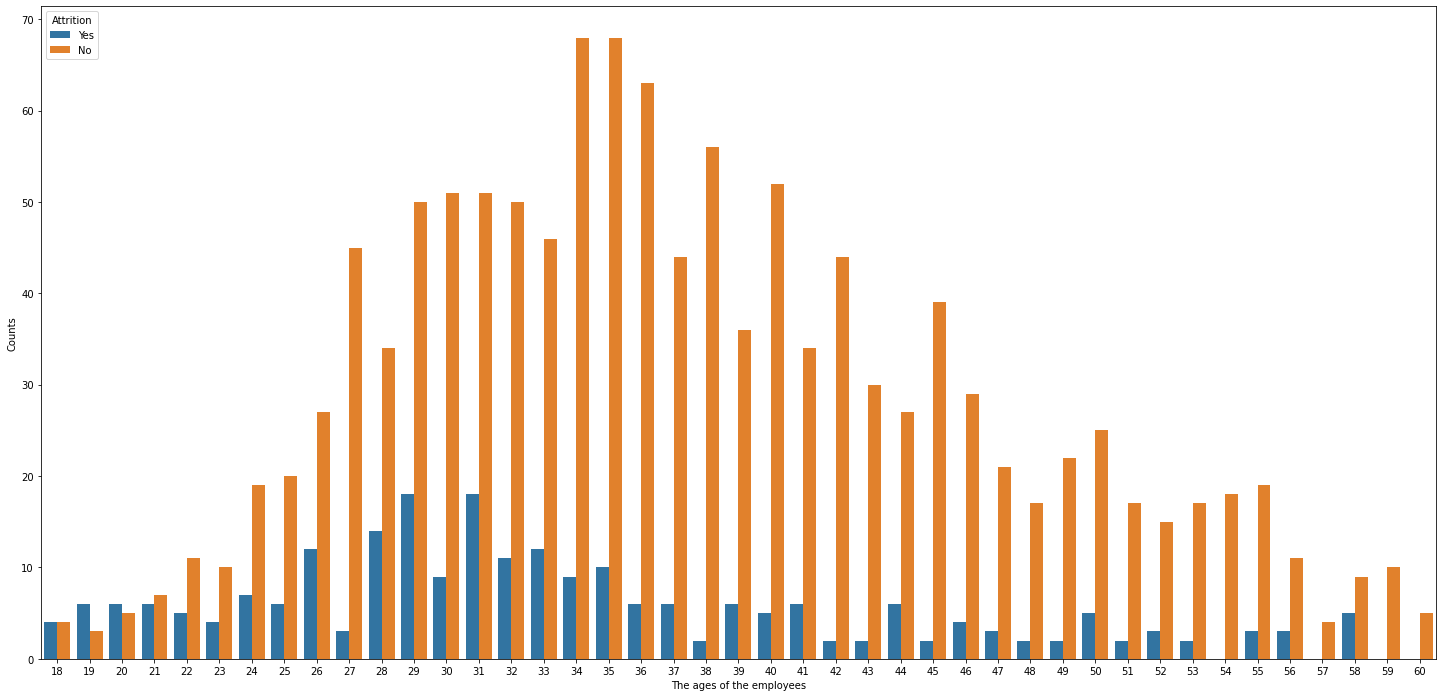

In [97]:
#QUESTION 3: What is the effect of age on attrition?
plt.figure(figsize = [25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)
plt.xlabel("The ages of the employees")
plt.ylabel("Counts")


#observation:here ages 18-23 are young employees who would like to explore, ages 34-35 are employees that want to have a stable job, are experienced and have responsibilities,52-60 are retired. 

In [186]:
#QUESTION 1
#What do you think are the 3 factors behind employee attrition?
#firstly you need to find the relationship of attrition to these factors
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
id                         -0.010369
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Y

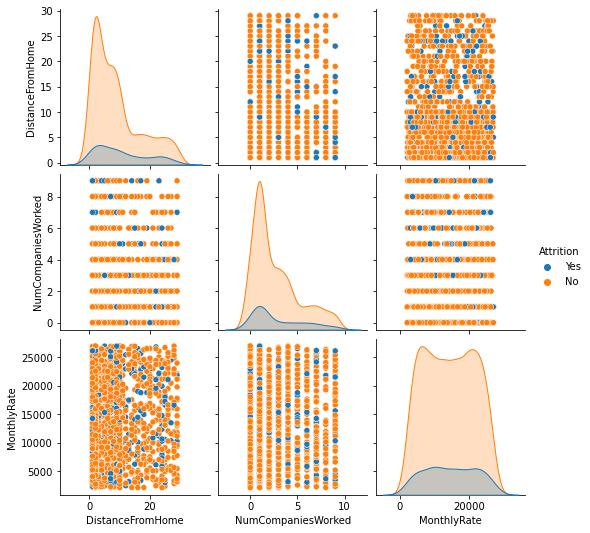

In [101]:
positive_high_correlation = ['Attrition','OverTime','DistanceFromHome','NumCompaniesWorked','Gender','MonthlyRate','PerformanceRating']
sns.pairplot(df[high_corr],hue='Attrition')

In [105]:
#QUESTION 4
#is Income the main factor in employee attrition?
#ANS:Normally one of the fators of employee attrition is monthly income but the given data shows that there was a negative correlation
df.corr = df.copy()
df.corr['Target'] = df.corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df.corr = df.corr.drop(['Attrition'], axis=1)
correlations = df.corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
EmployeeCount              NaN
StandardHours              NaN
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


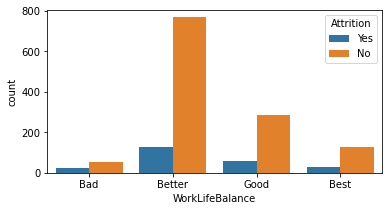

In [106]:
#QUESTION 5: How does work-life balance impact the overall attrition rate?
plt.figure(figsize=[6,3])
sns.countplot(x= df["WorkLifeBalance"], hue= "Attrition", data=df);

#observation:here tere is better work life balance when the employees stay